In [ ]:
import os
import numpy as np
import pandas as pd
import warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
warnings.filterwarnings('ignore')

df = pd.read_csv('https://raw.githubusercontent.com/Neha-Chiluka/deeplearning/refs/heads/main/tensorflow/data/winequalityN.csv')
df.sample(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
2862,white,5.1,0.110,0.32,1.6,0.028,12.0,90.0,0.99008,3.57,0.52,12.2,6
4479,white,6.0,0.555,0.26,4.5,0.053,17.0,126.0,0.99430,3.24,0.46,9.1,5
4878,white,6.2,0.530,0.02,0.9,0.035,6.0,81.0,0.99234,3.24,0.35,9.5,4
1597,white,6.4,0.270,0.49,7.3,0.046,53.0,206.0,0.99560,3.24,0.43,9.2,6
2853,white,5.3,0.160,0.39,1.0,0.028,40.0,101.0,0.99156,3.57,0.59,10.6,6


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Prepare the data
df = df.dropna()
df['is_white_wine'] = [
    1 if typ == 'white' else 0 for typ in df['type']
]
df['is_good_wine'] = [
    1 if quality >= 6 else 0 for quality in df['quality']
]
df.drop(['type', 'quality'], axis=1, inplace=True)

# Train/test split
X = df.drop('is_good_wine', axis=1)
y = df['is_good_wine']
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, random_state=42
)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow as tf
tf.random.set_seed(42)

In [ ]:
initial_model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

initial_model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

initial_history = initial_model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.LearningRateScheduler(
            lambda epoch: 1e-3 * 10 ** (epoch / 30)
        )
    ]
)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7047 - loss: 0.5552 - learning_rate: 0.0010
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7627 - loss: 0.4895 - learning_rate: 0.0011
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7761 - loss: 0.4743 - learning_rate: 0.0012
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7826 - loss: 0.4623 - learning_rate: 0.0013
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7889 - loss: 0.4532 - learning_rate: 0.0014
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7909 - loss: 0.4434 - learning_rate: 0.0015
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7984 - loss: 0.4332 - learning_rate: 0.0016
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8021 - loss: 0.4247 - learning_rate: 0.0017
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8079 - loss: 0.4131 - learning_rate: 0.0018
E

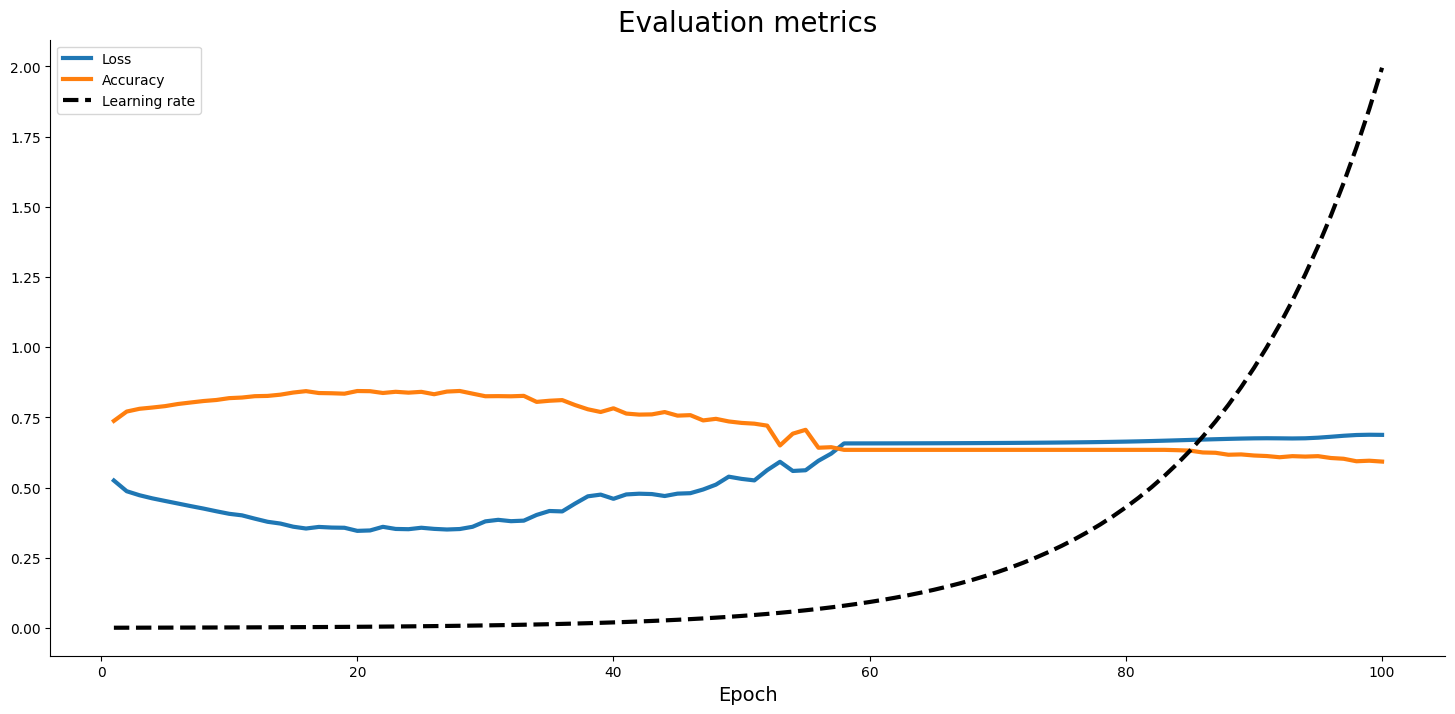

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = (18, 8)
rcParams['axes.spines.top'] = False
rcParams['axes.spines.right'] = False

# Extract learning rates from the scheduler function
learning_rates = [1e-3 * 10 ** (epoch / 30) for epoch in range(100)]


plt.plot(
    np.arange(1, 101),
    initial_history.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101),
    initial_history.history['accuracy'],
    label='Accuracy', lw=3
)
plt.plot(
    np.arange(1, 101),
    learning_rates, # Use the calculated learning rates instead of initial_history.history['lr']
    label='Learning rate', color='#000', lw=3, linestyle='--'
)
plt.title('Evaluation metrics', size=20)
plt.xlabel('Epoch', size=14)
plt.legend();

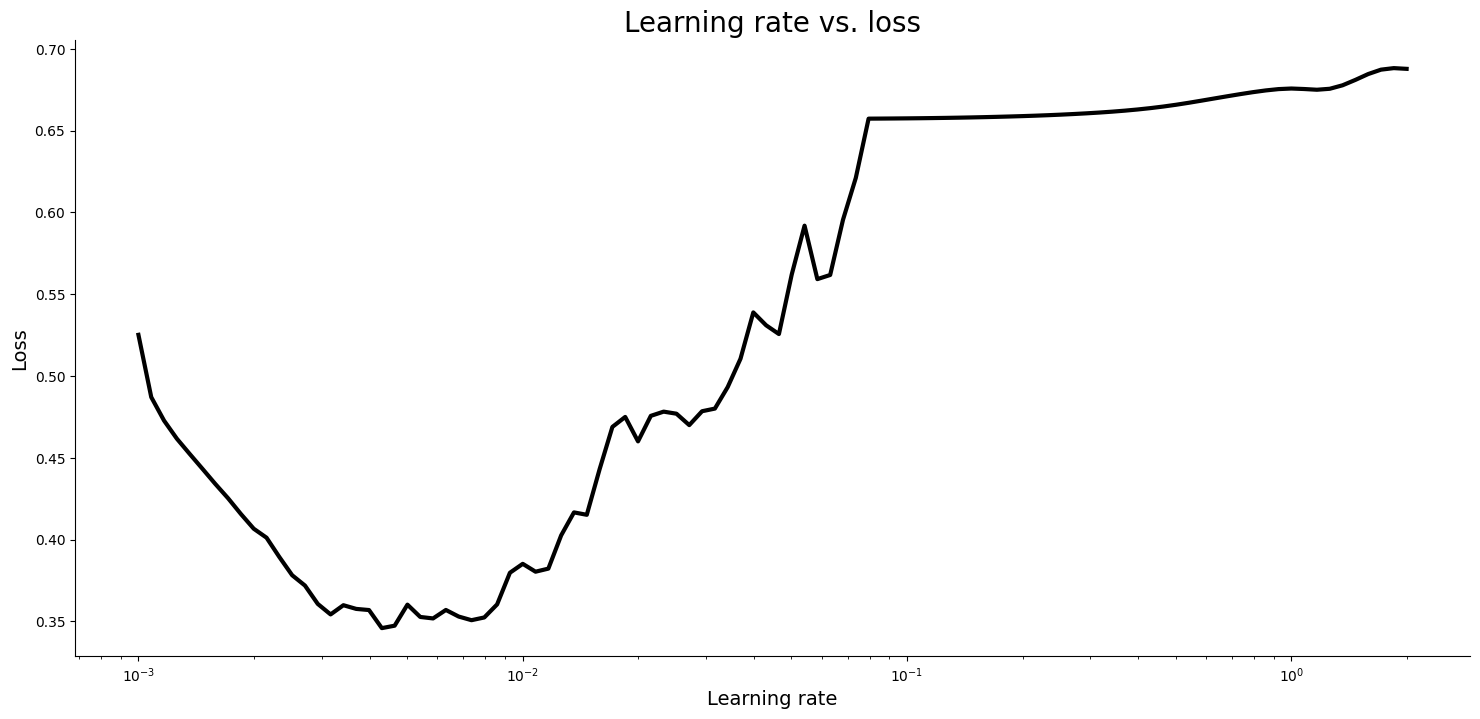

In [ ]:
learning_rates = 1e-3 * (10 ** (np.arange(100) / 30))
plt.semilogx(
    learning_rates,
    initial_history.history['loss'],
    lw=3, color='#000'
)
plt.title('Learning rate vs. loss', size=20)
plt.xlabel('Learning rate', size=14)
plt.ylabel('Loss', size=14);

In [ ]:
model_optimized = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_optimized.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.007),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy')
    ]
)

history_optimized = model_optimized.fit(
    X_train_scaled,
    y_train,
    epochs=100
)

Epoch 1/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7205 - loss: 0.5548
Epoch 2/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7557 - loss: 0.5052
Epoch 3/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7655 - loss: 0.4908
Epoch 4/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7701 - loss: 0.4816
Epoch 5/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7729 - loss: 0.4726
Epoch 6/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7865 - loss: 0.4647
Epoch 7/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7900 - loss: 0.4536
Epoch 8/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7871 - loss: 0.4480
Epoch 9/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7861 - loss: 0.4438
Epoch 10/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7852 - loss: 0.4353
Epoch 11/100
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7933 - loss: 0.4244
Epoch 12/100
162/162 ━━━━━━━━━━━━━━━━━━━━

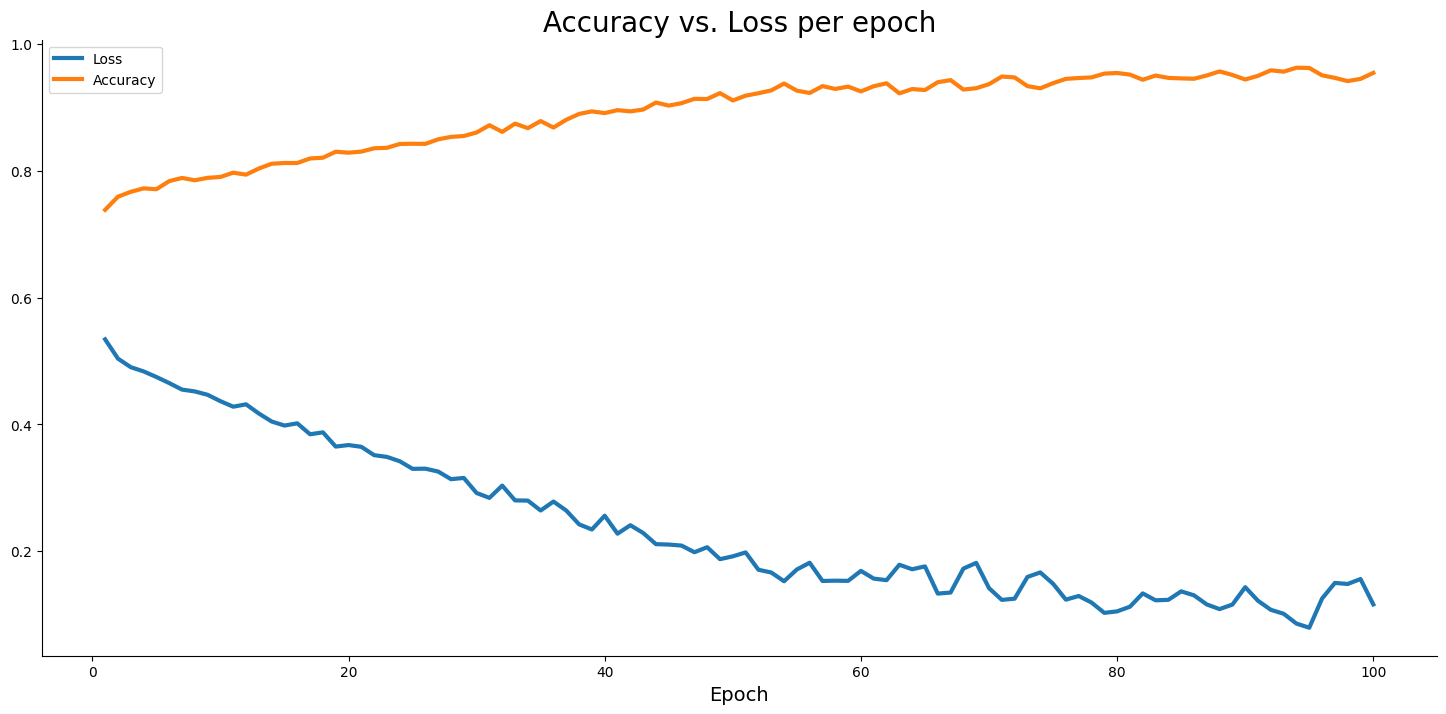

In [ ]:
plt.plot(
    np.arange(1, 101),
    history_optimized.history['loss'],
    label='Loss', lw=3
)
plt.plot(
    np.arange(1, 101),
    history_optimized.history['accuracy'],
    label='Accuracy', lw=3
)
plt.title('Accuracy vs. Loss per epoch', size=20)
plt.xlabel('Epoch', size=14)
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

predictions = model_optimized.predict(X_test_scaled)
prediction_classes = [1 if prob > 0.5 else 0 for prob in np.ravel(predictions)]


print(f'Accuracy on the test set: {accuracy_score(y_test, prediction_classes):.2f}')
print()
print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

print('Confusion matrix:')
print(confusion_matrix(y_test, prediction_classes))

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Accuracy on the test set: 0.79

Confusion matrix:
[[344 138]
 [130 681]]
Confusion matrix:
[[344 138]
 [130 681]]
